In [1]:
from google.colab import drive

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import kendalltau

In [3]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
scores = ...
correlation = ...

In [5]:
correlation

,k-NN,Model,Party,kendall-tau
0,1,ada-002,All,0.396011
1,1,ada-002,Democratic,0.582418
2,1,ada-002,Republican,0.512821
3,1,voyage-lite-01,All,0.475783
4,1,voyage-lite-01,Democratic,0.560440
5,1,voyage-lite-01,Republican,0.743590
6,3,ada-002,All,0.589744
7,3,ada-002,Democratic,0.802198
8,3,ada-002,Republican,0.717949
9,3,voyage-lite-01,All,0.789174


## Gráficos de distribución



<Axes: xlabel='Date', ylabel='Timeness'>

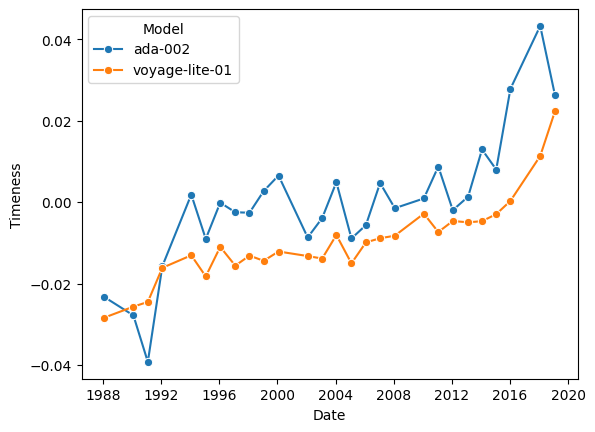

In [ ]:
model = scores[(scores["k-NN"] == 3) & (scores["Party"] == "All")]
sns.lineplot(data=model, x="Date", y="Timeness", marker="o", hue="Model")

6 veces: (all, rep, dem) x (voyage, ada)


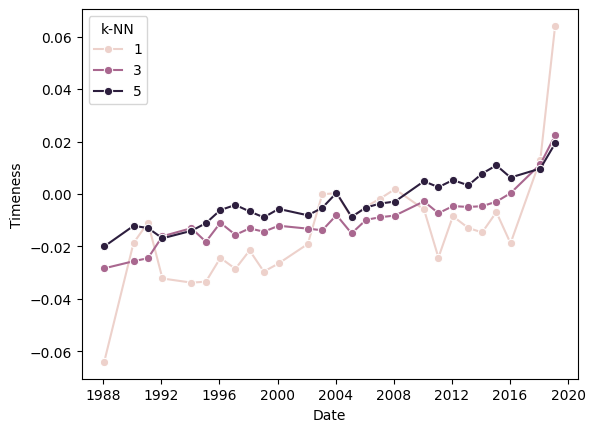

In [ ]:
k_nn = scores[(scores["Model"] == "voyage-lite-01") & (scores["Party"] == "All")]
sns.lineplot(data=k_nn, x="Date", y="Timeness", marker="o", hue="k-NN")

## Gráficos de Correlación

In [ ]:
party_all = correlation[(correlation["Party"] == "All")]

In [ ]:
parties = correlation[(correlation["Party"] != "All") & (correlation["k-NN"] == 3)]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 15})

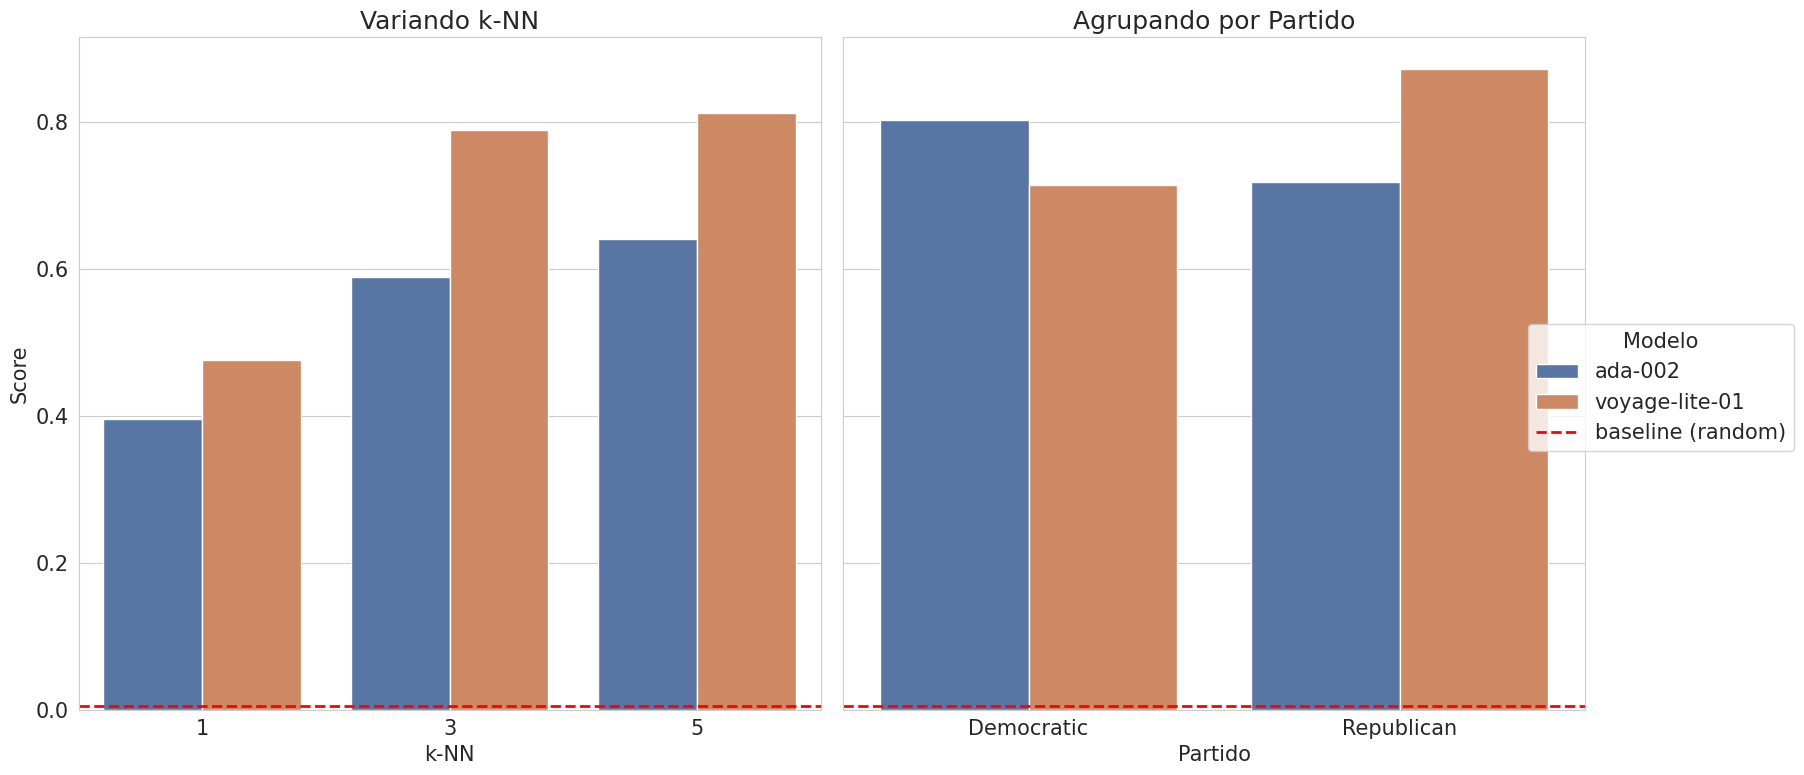

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


sns.barplot(
    data=party_all,
    x="k-NN",
    y="kendall-tau",
    hue="Model",
    ax=ax1,
    palette="deep"

)
ax1.axhline(0.005, color='red', linestyle='--', linewidth=2, label="baseline (random)")
ax1.set_ylabel("Score")
ax1.set_title("Variando k-NN")


sns.barplot(
    data=parties,
    x="Party",
    y="kendall-tau",
    hue="Model",
    ax=ax2,
    palette="deep"
)
ax2.axhline(0.005, color='red', linestyle='--', linewidth=2)
ax2.set_ylabel("Score")
ax2.set_xlabel("Partido")
ax2.set_title("Agrupando por Partido")


handles, labels = ax1.get_legend_handles_labels()

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(.85, 0.5), ncol=1, title="Modelo")

ax1.legend_.remove()
ax2.legend_.remove()

plt.tight_layout(rect=[0, 0, 0.9, 1])


plt.savefig("correlation.png")